In [35]:
import pandas as pd

datatrain = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
datatest = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

In [4]:
datatrain

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [5]:
X, y = datatrain.drop(columns=['Target', 'id']), datatrain['Target']

# Tes Multikolinieritas

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Marital status,10.786239
1,Application mode,4.069712
2,Application order,3.424182
3,Course,69.015339
4,Daytime/evening attendance,15.259539
5,Previous qualification,1.584425
6,Previous qualification (grade),174.037079
7,Nacionality,3.398352
8,Mother's qualification,4.276380
9,Father's qualification,5.237358


# Standarisasi

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction
Dikarenakan tingginya multikoliniertas pada beberapa variabel, maka perlu dilakukan reduksi dimensi

In [8]:
from sklearn.decomposition import PCA

pca_test = PCA()

X_pca_test = pca_test.fit_transform(X_scaled)

evr = pca_test.explained_variance_ratio_

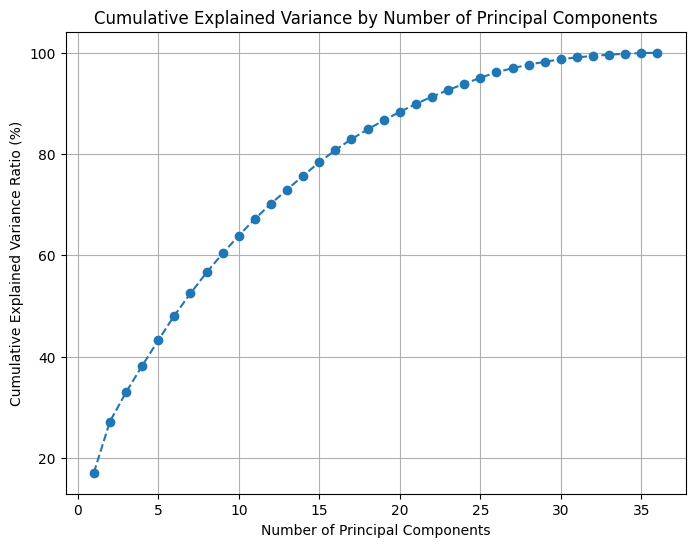

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
cumulative_explained_variance = np.cumsum(evr) * 100

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio (%)')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

Mengambil 25 komponen karena dengan 25 komponen sudah dapat menjelaskan sekitar lebih dari 90% varians

In [12]:
pca = PCA(n_components=25)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

In [13]:
X_pca

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.467075,-1.365655,0.087781,-0.123097,0.008646,-0.298859,0.184618,-0.787471,-0.685217,-0.193876,...,0.533409,0.257523,0.193921,-0.424465,0.162084,0.601131,-0.312572,-0.191832,0.540060,-0.309593
1,-0.598526,-0.413415,0.017526,0.716391,-1.109547,0.118712,-0.332612,-0.250133,-0.609635,0.158984,...,-0.112665,-1.283163,0.218567,-0.677446,-0.768402,-0.677984,0.360878,-0.012038,0.139537,0.271961
2,-3.287036,-0.850848,-2.243048,-0.278643,0.389349,0.990118,0.189539,-0.723739,1.789408,-1.200914,...,-1.122578,1.053736,-0.160450,0.620316,-0.579018,-0.019298,0.519391,0.148570,1.156608,0.008505
3,2.970136,-1.379378,-0.036499,0.230312,-0.653299,-0.163090,-0.312495,-0.337847,0.087687,0.657388,...,0.323690,0.554078,0.373204,-1.165289,-0.279503,-0.031217,-0.071813,0.028542,-0.231814,1.015560
4,2.300367,-0.445890,0.944244,0.221380,-0.852720,-0.349491,-0.642599,0.532975,-0.380996,0.588091,...,0.179297,-0.802592,0.308210,-0.207290,-0.088769,0.128737,-0.180958,-0.049166,0.246985,-0.703553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1.235837,-1.006951,-0.218564,0.235588,-0.790962,-0.316405,0.148266,-0.669197,-0.548473,-0.529655,...,0.323908,-0.144972,0.148726,-1.202824,0.091291,-0.927827,0.087602,0.120416,-0.472917,1.035380
76514,2.456146,-0.876721,0.263269,0.459320,-1.620671,-0.410722,0.065948,1.033622,-0.207627,0.509026,...,-2.024869,0.015351,0.019986,-1.026631,-0.893398,1.678751,-0.707014,-0.104627,1.559535,-0.878865
76515,-0.120765,2.325780,1.901366,-1.229379,0.212760,-1.568671,1.420179,5.160227,-1.170113,0.124377,...,-1.073212,-1.555998,5.485084,0.981164,1.286876,-0.701728,0.632504,0.310213,1.539414,-0.488846
76516,-2.966448,-1.510865,0.574572,0.084087,-0.194393,0.882572,-2.834605,0.801756,1.645789,0.398660,...,0.321316,-0.693118,-0.096401,0.299319,-0.026628,0.231632,-0.193939,0.553444,0.365319,0.051577


In [14]:
y.value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Tidak melakukan stratifikasi karena kelas sudah lumayan seimbang

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)

# Pemodelan Menggunakan SVM
Mencoba hyperplane linear

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
y_pred = svc.predict(X_test)

In [50]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test,y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8132514375326712
Balanced Accuracy: 0.7672348046786498
              precision    recall  f1-score   support

     Dropout       0.91      0.79      0.84      5059
    Enrolled       0.60      0.59      0.60      2988
    Graduate       0.84      0.92      0.88      7257

    accuracy                           0.81     15304
   macro avg       0.78      0.77      0.77     15304
weighted avg       0.82      0.81      0.81     15304



Mencoba hyperplane polinom

In [51]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [52]:
y_pred_poly = svc_poly.predict(X_test)

In [53]:
print(f'Accuracy: {accuracy_score(y_test,y_pred_poly)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test,y_pred_poly)}')
print(classification_report(y_test, y_pred_poly))

Accuracy: 0.806913225300575
Balanced Accuracy: 0.7512781253350934
              precision    recall  f1-score   support

     Dropout       0.91      0.78      0.84      5059
    Enrolled       0.61      0.53      0.57      2988
    Graduate       0.82      0.93      0.87      7257

    accuracy                           0.81     15304
   macro avg       0.78      0.75      0.76     15304
weighted avg       0.81      0.81      0.80     15304



Mencoba hyperplane Gaussian RBF

In [54]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

SVC()

In [55]:
y_pred_rbf = svc_rbf.predict(X_test)

In [56]:
print(f'Accuracy: {accuracy_score(y_test,y_pred_rbf)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test,y_pred_rbf)}')
print(classification_report(y_test, y_pred_rbf))

Accuracy: 0.819328280188186
Balanced Accuracy: 0.7696053717892416
              precision    recall  f1-score   support

     Dropout       0.91      0.80      0.85      5059
    Enrolled       0.63      0.58      0.60      2988
    Graduate       0.83      0.93      0.88      7257

    accuracy                           0.82     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.82      0.82      0.82     15304



# Prediksi dengan model akurasi tertinggi

In [57]:
prediksi_scaled = scaler.transform(datatest.drop(columns=['id']))
prediksi_pca = pca.transform(prediksi_scaled)

In [58]:
test_pred = svc_rbf.predict(prediksi_pca)

In [59]:
prediksi = pd.DataFrame({'id': datatest['id'],
                        'Target': test_pred})
prediksi

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [61]:
prediksi.to_csv('/kaggle/working/prediksi_stratified.csv', sep=',', index=False)